# Assignment 1

The purpose of this assignment is to serve as a "check-point" on your knowledge of
- Jupyter
- NumPy, Pandas
- The very basic elements of sklearn
- Notebook style

You will construct a linear regression model to predict the return of a ticker, given the returns of an index (SPY).  You will source the data, assemble it into a useful form, and transform it as needed.  Finally, you will use sklearn to build the model and evaluate it using the RMSE Performance metric.

# Instructions
You will need to complete this notebook.  The final result should follow the style of our Recipe for ML (see Geron, Appendix B) as appropriate

Your task is to complete the coding sections, and to add sections that discus the problem, the data, and your exploration process.  We have only supplied the required coding sections.  The rest is up to you.

1. Code sections
    - We have given you an outline of the code, with missing elements
    - The <span style="color:red">Red Section Headers</span> contain code templates that you need to complete
        - We have supplied the signature for the functions, and a specification
        - Your job is to implement the function so as to satisfy the specification
        - Please **DO NOT** change function signatures in the templates, or variable names on the left hand side of existing code without approval from the instructor or GA
        - We will test your code for correctness by calling the functions in the template, and evaluating certain variables (whose values you will compute).  If you change these, it will make evaluation more difficult.
        
1. Other sections
    - Add all the sections in our "reciple for ML" (e.g. see Geron Appendix B) as appropriate
    - Consider this an example of what you would submit as part of a take-home job interview
    - We want to see *how* you approached the problem, not just the solution

     
**REMEMBER** Working code and correct answers give partial credit.  To get full credit, your notebook should reflect your process of thinking and exploration (i.e., lots of markdown, graphs where appropriate, etc.)

# A. Importing the modules

In this project, the goal is tring to explore the relationship between stocks and stocks index, using linear regression method

The first part will be imporing the modules needed, which includes `Numpy`, `Panda`, `Matplotlib` and `Sklearn`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# %load "./assignment_1_answers.py"

# <span style="color:red">Import any other modules you need</span>

In [3]:
# Your imports
from sklearn import linear_model                            # to do the regression
from sklearn.metrics import mean_squared_error, r2_score   #to calculate the  `RMSE`, `R^2`


# B. Obtaining and plotting data 

# <span style="color:red">Create function to obtain the train and test data</span>

## Obtaining data

This function returns to a DataFrame with `Dependent` and `Independent` as the names of the columns and with Date as the index.

Date will be in the form of `2018-01-01`

In [4]:
def getData(ticker, indx):
    """
    Retrieve two timeseries: one for a ticker and one for an index.
    Return a DataFrame containing the two timeseries.
   
    Parameters
    ----------
    ticker, indx: Strings representing the stock symbol for "ticker" and the "index"
    
    The two timeseries are in separate CSV files.  The code below will construct the names of the files from
    the stock symbol strings.
    
    The files contain multiple features. The feature of interest to us is "Close", which is the closing price.
        
    
    Returns
    --------
    df: a DataFrame with the following properties
    
    df.index should be the dates in the timeseries
    df should have (at least) 2 columns, with names:
    "Dependent"
    "Independent"
    
    df.loc[:, "Dependent"] should be the timeseries of the "Close" attribute for the ticker
    df.loc[:, "Independent"] should be the timeseries for the "Close" attribute of the index against which we are computing beta.
    """
    
    # Construct the name of the files containing the ticker and the "index"
    ticker_file = "./data/assignment_1/{t}.csv".format(t=ticker)
    indx_file   = "./data/assignment_1/{t}.csv".format(t=indx)
    
    # Create the function body according to the spec
    data1 = pd.read_csv(ticker_file)
    data2 = pd.read_csv(indx_file)
    df = pd.DataFrame([list(data1.Close),list(data2.Close)])

    # Change the return statement as appropriate\
    df = df.T
    df.index = data1.Date.tolist()
    df.columns = ['Dependent', 'Independent']
    return df

In [5]:
# Ticker: BA (Boeing), Index: SPY (the ETF for the S&P 500)
Ticker = "FB"
Index = "SPY"
df = getData(Ticker, Index)

X = df.loc[:, ["Independent"] ]
y = df.loc[:, ["Dependent"] ]


X.describe()


,Independent
count,251.000000
mean,274.339641
std,10.079264
min,234.339996
25%,268.830002
50%,273.980011
75%,281.035004
max,293.579987


In [6]:
y.describe()

,Dependent
count,251.000000
mean,171.510956
std,19.977452
min,124.059998
25%,157.914993
50%,174.699997
75%,185.269997
max,217.500000


## C. Plotting raw data

Plotting the data is a pretty straightforward way for us to know the distribution of the data

<Figure size 432x288 with 0 Axes>

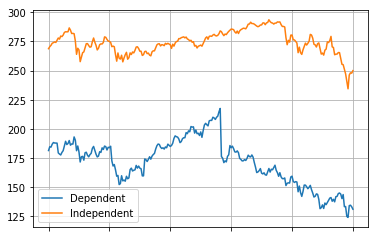

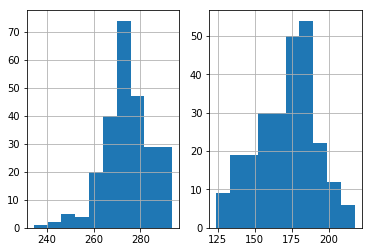

In [7]:
plt.figure()
_ = df.plot()
_.grid()

fig = plt.figure()
ax = fig.add_subplot(121)
_ =ax.hist(X.values,bins = 10)
ax.grid()

ax = fig.add_subplot(122) 
_ =ax.hist(y.values,bins = 10)
ax.grid()




# D. Spliting data 

Split the data into training set and testing set

# <span style="color:red">Create function to split the full data into train and test data</span>

This `split` function is to split the labels set and features set, respectively, into two sets according to date. Random seed is not used in this function because we split them according to given date not randomly

In [8]:
def split(X, y, seed=42):
    """
    Split the data into a training and test set
    
    The training data should span the date range from 1/1/2018 to 6/30/2018
    The test data should span the date range from 7/1/2018 to 7/31/2018
    
    Parameters
    ----------
    X: DataFrame containing the independent variable(s) (i.e, features, predictors)
    y: DataFrame containing the dependent variable (i.e., the target)
    
    Optional
    --------
    seed: Integer used as the seed for a random number generator
      You don't necessarily NEED to use a random number generator but, if you do, please use the default value for seed
    
    Returns
    -------
    X_train: DataFrame containing training data for independent variable(s)
    X_test:  DataFrame containing test data for independent variable(s)
    y_train: DataFrame containing training data for dependent variable
    y_test:  DateFrame containing test data for dependent variable
    """
    # IF  you need to use a random number generator, use rng.
    rng = np.random.RandomState(seed)
    
    # Create the function body according to the spec
    result = []
    result.append(X.loc['2018-01-01':'2018-06-30',:])
    result.append(X.loc['2018-07-01':'2018-07-31',])
    result.append(y.loc['2018-01-01':'2018-06-30',:])
    result.append(y.loc['2018-07-01':'2018-07-31',])

    # Change the return statement as appropriate
    return result
   

In [9]:
# Split the data into a training and a test set
X_train, X_test, y_train, y_test = split(X, y)
X_train.head()

,Independent
2018-01-02,268.769989
2018-01-03,270.470001
2018-01-04,271.609985
2018-01-05,273.420013
2018-01-08,273.920013


In [10]:
X_test.head()

,Independent
2018-07-02,271.859985
2018-07-03,270.899994
2018-07-05,273.109985
2018-07-06,275.420013
2018-07-09,277.899994


In [11]:
y_train.head()

,Dependent
2018-01-02,181.419998
2018-01-03,184.669998
2018-01-04,184.330002
2018-01-05,186.850006
2018-01-08,188.279999


In [12]:
y_test.head()

,Dependent
2018-07-02,197.360001
2018-07-03,192.729996
2018-07-05,198.449997
2018-07-06,203.229996
2018-07-09,204.740005


# E. Preparation of data

In this part, prices of tickers and index are transfermed into returns of tickers and index.

Also, if we try to make real prediction, using data of historical to predict future data, we need to using return of X from yesterday to predict return of y of today. one to one correspondence of yestaday's index return and today's stock return can be established if we add codes below

`
    '''
    result = []
    _ = temp[0].drop(temp[0].index[-1]) 
    result.append(_)
    _ = temp[1].drop(temp[1].index[-1])
    result.append(_)
    _ = temp[2].drop(temp[2].index[0])
    result.append(_)
    _ = temp[3].drop(temp[3].index[0]) 
    result.append(_)
    '''
`

# <span style="color:red">Create a function to perform any other preparation of the data needed</span>
   

In [13]:
def prepareData( dfList ):
    """
    Prepare each DataFrame df in the list of DataFrames for use by the model
    
    This is the time to convert each of your datasets into the form consumed by your model.  For example:
    - do any columns of df needed to be converted into another form ?
    
    
    Parameters
    ----------
    dfList:  A list of DataFrames
    
    Returns
    -------
    finalList: A list of DataFrames.  There is a one to one correspondence between items in
      dfList and finalList, so
        
      len(finalList) == len(dfList)
    
    Consider the DataFrame at position i of dfList (i.e, dfList[i]).
    The corresponding element of finalList (i.e, finalList[i]) will have changed dfList[i] into the DataFrame
    that will be used as input by the sklearn model.

    """
    
    # Create the function body according to the spec
    temp = []
    for i,data1 in enumerate(dfList):
        temp.append(pd.DataFrame(data1[1:].values/data1[0:-1].values-1))
    
    result = temp
    
    '''
    Adding code below is to using yesterday X to predict today's y
    deleting result = temp above
    result = []
    _ = temp[0].drop(temp[0].index[-1]) 
    result.append(_)
    _ = temp[1].drop(temp[1].index[-1])
    result.append(_)
    _ = temp[2].drop(temp[2].index[0])
    result.append(_)
    _ = temp[3].drop(temp[3].index[0]) 
    result.append(_)
    '''
    
    # Change the return statement as appropriate
    return result


# <span style="color:red">Transform the raw data, if needed</span>

# Plotting transformed data

In [14]:
# If needed: turn each of the "raw" X_train, X_test, y_train, y_test into a "transfomred" versions containing the features needed by the model
# - you will need to replace the empty list argumentX_train.head()
X_train, X_test, y_train, y_test = prepareData( [ X_train, X_test, y_train, y_test ] )


In [15]:
train_all = pd.concat([X_train,y_train],axis=1)
test_all = pd.concat([X_train,y_train],axis=1)

From the below picture of return of ticker and index, we can easily find that the varience of ticker is greater than that of index

Also,return, compared to price, is much more stable. In other words, the expectation is constant and variance is not increasing. Return is a better indicator that price

<Figure size 432x288 with 0 Axes>

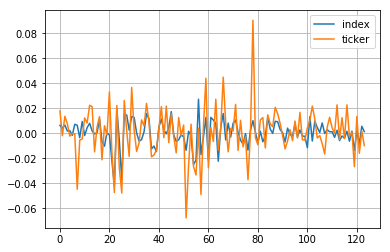

<Figure size 432x288 with 0 Axes>

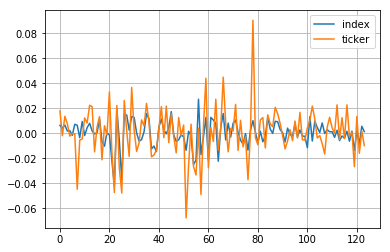

In [16]:
plt.figure()
_ = train_all.plot()
_.grid()
_.legend(["index","ticker"])

plt.figure()
_ = test_all.plot()
_.grid()
_.legend(["index","ticker"])

# F. Trainning models and getting result

# <span style="color:red">Create function to convert the DataFrames to ndarrays</span>

In [17]:
def pd2ndarray( dfList ):
    """
    For each DataFrame in the list dfList, prepare the ndarray needed by the sklearn model
    
    Parameters
    ----------
    dfList: List of DataFrames
    
    Returns
    --------
    ndList: a list of ndarrays
    """
    
    # Create the function body according to the spec
    result = []
    for i,dataset in enumerate(dfList):
        result.append(dataset.values) # transfer DataFrame into ndarray
        
    # Change the return statement as appropriate
    return result
   

In [18]:
# sklearn takes ndarrays as arguments, not DataFrames; convert your DataFrames to the appropriate ndarray
# You will need to replace the empty list argument
X_train, X_test, y_train, y_test = pd2ndarray( [X_train, X_test, y_train, y_test] )


# <span style="color:red">Create function to return the sklearn model you need</span>

In [19]:
def createModel():
    """
    Create an sklearn model object
    
    Parameters
    ----------
    None
    
    Returns
    -------
    model: An sklearn model object,
    i.e., responds to model.fit(), model.predict()
    """
    
    # Create the function body according to the spec
    model = linear_model.LinearRegression()
    
    # Change the return statement as appropriate
    return model

In [20]:
# Create linear regression object
model = createModel()

# Train the model using the training sets
_ = model.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', model.intercept_, model.coef_)

Coefficients: 
 [0.0005995] [[1.20737853]]


# <span style="color:red">Create function to compute a Root Mean Squared Error</span>

In [21]:
def computeRMSE( target, predicted ):
    """
    Compute the Root Mean Squared Error (RMSE)
    
    Parameters
    -----------
    target: ndarray of target values
    predicted: ndarray of predicted values
    
    Returns
    -------
    rmse: a Scalar value containg the RMSE
    """
    
    # Create the function body according to the spec
    rmse = np.sqrt( mean_squared_error(target,  predicted))
        
    # Change the return statement as appropriate
    return rmse

# <span style="color:red">Evaluate in and out of sample Root Mean Squared Error</span>

In [22]:
# Predictions:
# predict out of sample: You will need to change the None argument
y_pred_test = model.predict( X_test )

# predict in sample: You will need to change the None argument
y_pred_train = model.predict( X_train )

In [23]:
# Compute the in-sample fit
# - you will need to replace the None's below with the appropriate argument
rmse_insample = computeRMSE( y_train, y_pred_train )
print("RMSE (train): {r:2.3f}".format(r=rmse_insample))

print("R-squared(train): {:.2f}".format(r2_score(y_train, y_pred_train)) )

# Compute the out of sample fit
# - you will need to replace the None's below with the appropriate argument
rmse_outOfsample = computeRMSE( y_test, y_pred_test)
print("RMSE (test): {r:2.3f}".format(r=rmse_outOfsample))



RMSE (train): 0.016
R-squared(train): 0.39
RMSE (test): 0.043


# <span style="color:red">Please answer the following questions</span>

- What are your thoughts/theories on the in sample vs out of sample performance ?
- Repeat the experiment using ticker FB (Facebook) rather than ticker BA (Boeing)
    - What are your thoughts of in sample vs out of sample performance, especially compared to BA
        - Maybe our predictor (SPX Index return) was *not* a great predictor for FB
        - any thoughts for a better one ?
            - run the experiment using another predictor; there are more timeseries in the same directory


Before using today's X to predict today's y, I used yesterday's X to predict today's y. 
And the prediction runs badly. R-squared is pretty small and almost zero, indicating that index return of yesterday cannot be a predictor to stock return. They are not linearly correlated.



After that, I study the relation bewteen today's X and todya's y and get the RMSE metrics below for `BA` and `FB`

BA:

RMSE (train): 0.014

R-squared(train): 0.49

RMSE (test): 0.011

FB:

RMSE (train): 0.016

R-squared(train): 0.39

RMSE (test): 0.043


For both BA and FB, the regressions are running not very well, but we still can see some correlation bewteen returns of index and ticker

For `in sample vs out of sample performance`, FB might have some overfitting problem since in sample RMSE is much better that out of sample RMSE

Now, we change the predictor from `SPY` to `QQQ`. Comparing R-squared of `QQQ` and `SPY` ,we can find that `QQQ` is better predictor for FB but not for BA

BA:

RMSE (train): 0.016

R-squared(train): 0.38

RMSE (test): 0.012

FB:

RMSE (train): 0.015

R-squared(train): 0.47

RMSE (test): 0.039

To improve the performance, I think more predictors should be put into model. Apparaently, the return of a stock cannot just depend on the return of index. And it might be also depend on the other stocks in the same industry. Even, it might depends on its onw performance before.

# <span style="color:red">Extra credit</span>

- Assume our test set remains unchanged
    - Does changing the date range of our training data affect the Performance metric (test RMSE)
        - holding constant the last date of the training data
        - plot the Performance metric versus the number of days of training data
        
- What are some of the challenges of timeseries data ?
    - The Performance metric is an average that doesn't take an time-varying pattern of error into account
        - show a scatter plot of error versus distance from date of last training point
            - any pattern ? Theories ?
    - We split train/test so that each has a continous date range
        - we didn't use the standard sklearn `sklearn.model_selection.train_test_split`, which shuffles data
            - what are the consideratons of shuffling data when we are dealing with timeseries ?